<a href="https://colab.research.google.com/github/Omar-Saeed-OASS/Digit-Classifier-Deep-Learning-Model/blob/main/Digit_Classifier_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries:

import torch
from torch import nn
import torchvision
from torchvision.transforms import ToTensor
from torchvision import datasets
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# Download the datasets:

ROOT = "/content"

train = torchvision.datasets.MNIST(
    root=ROOT,
    download=True,
    train=True,
    transform=ToTensor()
)

test = torchvision.datasets.MNIST(
    root=ROOT,
    download=True,
    train=False,
    transform=ToTensor()
)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.94MB/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [3]:
digit_classes = test.classes
digit_classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
# The Digit Classifier Model:

class Digit_Classifier_Model(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_units):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    """The Forward Pass"""
    return self.layers(x)


In [5]:
# Setup the model and agnostic code:

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f">> Model is on: {device}\n")

Digit_Classifier = Digit_Classifier_Model(input_shape=784, output_shape=len(digit_classes), hidden_units=10)
Digit_Classifier.to(device)


>> Model is on: cuda



Digit_Classifier_Model(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): ReLU()
    (7): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [31]:
# Create and download  the model state_dict file
DIR = Path("Models")
DIR.mkdir(parents=True, exist_ok=True)
!wget -O "Models"/Digit_Classifier_state_dict.pth "https://github.com/Omar-Saeed-OASS/Digit-Classifier-Deep-Learning-Model/raw/767a9cf82e4159d3dbdd6dd63248dd299a21f9e2/Digit_Classifier_Model.pth"

In [35]:
# Load the state dict to the model:
STATE_DICT_FILE = "/content/Models/Digit_Classifier_state_dict.pth"
Digit_Classifier.load_state_dict(torch.load(STATE_DICT_FILE))

<ipython-input-35-b995e50c03da>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Digit_Classifier.load_state_dict(torch.load(STATE_DICT_FILE))


<All keys matched successfully>

Text(0.5, 1.0, 'Predicted: 8 | Real: 8')

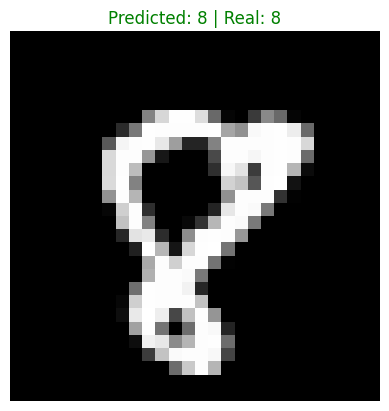

In [121]:
# Generate random ID to test the model:
rand_idx = torch.randint(0, len(test), size=[1]).item()
X_img, X_lbl = test[rand_idx]
image_to_predict = X_img.to(device)

# Predict the random number:
Digit_Classifier.eval()
with torch.inference_mode():
  prediction = Digit_Classifier(image_to_predict)

# Get the predicted number class:
predicted_class = torch.argmax(prediction, dim=1).item()


# Title color:
title_color = "green" if predicted_class == X_lbl else "red"

# Plot the image:
plt.imshow(X_img.squeeze(), cmap="gray")
plt.axis(False)
plt.title(f"Predicted: {predicted_class} | Real: {X_lbl}", color=title_color)